# <span style="color:black">Welcome to My Project Notebook </span>
### <span style="color:black">By Ronan Noonan student number G00384824 </span>
### <span style="color:black">Atlantic Technological University </span>

<hr>

## Introduction 

In this notebook, I embark on an exciting journey to unravel the intricacies of the Deutsch's algorithm. I will explain its workings, its importance in the field of quantum computing, and how it best represents the capabilities of quantum algorithms through a step-by-step investigation.

<hr>

**Imports:**

In [247]:
from qiskit import QuantumCircuit , execute, transpile, assemble, BasicAer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

<hr>

##  Understanding Quantum Computing

### What is Quantum Computing?
Quantum computing is a rapidly-emerging technology that allows us to solve problems too tough for regular computers. These computers use special methods called quantum algorithms to show their potential. One of the earliest and most notable of these methods is the Deutsch algorithm. It was one of the first to demonstrate the potential advantages of quantum computation over classical methods. While it might not have everyday applications, it's crucial in the quantum world. It shows how these new computers can outperform regular ones and hints at the exciting possibilities ahead.

<a href="https://www.ibm.com/topics/quantum-computing" style="color: black;">**(1) Understanding Quantum Computing** _IBM_</a> & <a href="https://www.classiq.io/insights/the-deutsch-jozsa-algorithm-explained" style="color: black;">**(2) Deutsch Algorithm** _ClassicIQ_</a>

### Why do we need quantum computers?
When confronted with challenging issues, scientists and engineers often rely on supercomputers. They use these Supercomputers, loaded with advanced CPUs and GPUs, for complex tasks. 

<a href="https://www.ibm.com/topics/quantum-computing" style="color: black;">**(1) Understanding Quantum Computing** _IBM_</a>

### Explain quantum computing
Quantum computing offers a novel approach compared to traditional methods. Rather than using bits which are 0 or 1, quantum computers operate with qubits that can be in a superposition of both states. Deutsch's algorithm exemplifies this advantage. It efficiently determines if a function is balanced or constant using just a single quantum query, whereas a classical approach would need two. This quantum efficiency is derived from principles like superposition and entanglement, which allow for advanced computational behaviors. These capabilities underscore the transformative potential of quantum computing.

<a href="https://www.qmunity.tech/tutorials/deutschs-algorithm" style="color: black;">**(3) Explain Quantum Computing** _Q-Munity_</a>

### Quantum being tested against classical
IBM's 127-qubit quantum processor was employed in a significant experiment to carry out complex calculations, later verified by classical computers for accuracy. Experts from UC Berkeley and RIKEN iTHEMS participated in this study to assess the advantages of quantum computing over traditional techniques. The outcomes showed that, especially as the complexity of the calculations rose, quantum computing has the potential to handle difficult jobs that classical computers find difficult.

<a href="https://research.ibm.com/blog/utility-toward-useful-quantum" style="color: black;">**(4) Quantum vs classical** _IBM_</a>

### Applications of Quantum Computing:

- Optimization: Improving asset pricing and budgeting methods.
- Chemistry: Simulating atomic quantum reactions.
- Material Science: Discovering new materials.
- Machine Learning: Processing vast data.
- Medicine: Modeling atomic-level molecular interactions for drug discovery.
- Security: Challenging existing cryptographic protocols.

<a href="https://jpt.spe.org/quantum-computing-emerges-game-changer" style="color: black;">**(5) Quantum Computing Emerges as a Game Changer** _JPT_</a> &

<hr>

### Explain Qubits
The fundamental unit of quantum information. Unlike regular bits (0 or 1), a qubit can represent both simultaneously due to superposition. This is why quantum computers can process vast amount of information.
#### Superposition:
Superposition allows a qubit to be in multiple states at the same time, a key feature that enables quantum computers to perform multiple calculations simultaneously.
#### Entanglement:
A phenomenon where two or more Qubits become interconnected, the state of one qubit is dependent on the state of another, no matter the distance between them. Changes to one particle instantly affect the others, providing quantum computers additional power.

<a href="https://www.educative.io/blog/intro-to-quantum-computing" style="color: black;">**(6) Qubits, superposition & Entanglement** _educative_</a>

<hr>

## Quantum Gates and the Deutsch Algorithm
So we have figured out that Quantum computing operates fundamentally differently than classical computing. Instead of the classical bits, it employs qubits, which are manipulated using quantum gates. Unlike classical gates like AND, OR, and NOT, quantum gates utilize the principles of superposition and entanglement to allow for a richer computational framework. A crucial quantum gate used in many quantum algorithms, including Deutsch's, is the Hadamard gate, denoted as H. This gate can put a qubit in a superposition of both ∣0⟩ and ∣1⟩ states. Combined with other gates such as the phase gate, CNOT, and π/8, we can build a 'universal set' of quantum gates, allowing quantum computers to potentially simulate any physical system and provide new insights into our universe's workings.

The Deutsch algorithm specifically utilizes the Hadamard gate to create and manipulate superpositions, aiding in distinguishing between constant and balanced functions in a single query.

Here's a simple Python code snippet using Qiskit to demonstrate the application of a Hadamard gate: 

<a href="https://techcommunity.microsoft.com/t5/educator-developer-blog/quantum-gates-and-circuits-the-crash-course/ba-p/380463" style="color: black;">**(7) Quantum-Gates-and-Circuits** _Anita Ramanan First published on MSDN on Feb 26, 2018_</a>

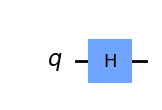

In [248]:
# Using Qiskit to apply a Hadamard gate

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply the Hadamard gate to the qubit
qc.h(0)

# Display the circuit
qc.draw('mpl')

<hr>


## Deutsch's Algorithm

Deutsch's Algorithm is a important quantum algorithm that showcases the capabilities and power of quantum computing for specific computational tasks. It's designed to figureout what the binary function is $f: \{0,1\} \rightarrow \{0,1\}$ with a single query to a quantum oracle. The algorithm can determine whether the given function is the same output for both inputs or different outputs for each input. This can also be said as constant(same) or balanced(different). What is the problem addressed by Deutsch's Algorithm?

The problem addressed by Deutsch's Algorithm can be stated as follows:

Given A black-box quantum oracle implementing a function $f: \{0,1\} \rightarrow \{0,1\}$ We know this function is guaranteed to be either constant or balanced. A constant function will return the same value either 0 or 1 for both inputs 0 and 1. A balanced function returns opposite values for each input 0 for one input and 1 for the other.  <br>
The Objective is to Determine whether the function $f$ is constant or balanced.

In classical computing, determining the nature of this function would typically require two queries – one for each input. However, as we have seen with quantum computing we can achieve this with a single query. This shows how quantum computing solves certain problems better than clasical computing. The algorithm operates by mixing two quantum bits into a special quantum state and then applying a specific quantum operation to represent the function. At the end, by measuring these quantum bits, the algorithm figures out if the function always gives the same result or different results for different inputs.

<a href="https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#deutschs-algorithm" style="color: black;">**(8) Deutsch's Algorithm** _IBM_</a>

<hr>

## Implementing Deutsch's Algorithm Using Qiskit

 Let's use everything we've learned about Deutsch's Algorithm and the theoretical components of quantum computing. Deutsch's Algorithm will be implemented with Qiskit, a potent quantum computing tool.

**Step by Step implementation**

_STEP 1:_ Constructing the Quantum Circuit

In [249]:
# Creating a quantum circuit with 2 qubits and 1 classical bit
qc = QuantumCircuit(2, 1)

_STEP 2:_ Preparing the Qubits

In [250]:
# Applying Hadamard gate to both qubits
qc.h(0)
qc.x(1)
qc.h(1)


_STEP 3_: Implementing the Oracle

In [251]:
# Example of a balanced oracle
qc.cx(0, 1)

# Example of a constant oracle
# qc.id(0)  # Identity gate (does nothing), representing a constant function


_STEP 4:_ Completing the Circuit

In [252]:
# Applying Hadamard gate and measuring the first qubit
qc.h(0)
qc.measure(0, 0)


_STEP 5:_ Displaying the Circuit

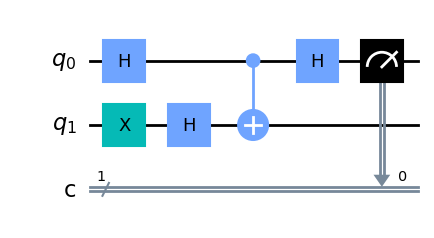

In [253]:
# Displaying the circuit
qc.draw('mpl')


_STEP 6:_ Running the Circuit and Observing the Result

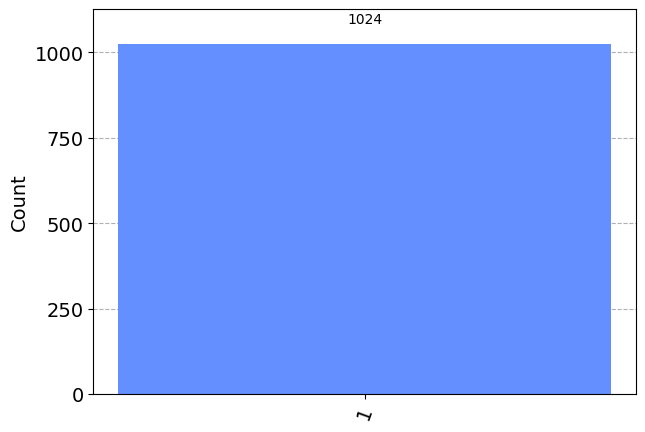

In [254]:
# Executing the circuit using the Aer simulator
simulator = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()

# Displaying the histogram of results
plot_histogram(result.get_counts(qc))


##### **Evaluation of results**
The output '0' indicates a constant function, while '1' indicates a balanced function.
This result demonstrates the quantum advantage in query complexity.

##### **Conclusion**
Implementing Deutsch's Algorithm provides practical insights into the power of quantum computing and its potential to solve complex problems more efficiently than classical computing.

### Implementing the Deutsch-Jozsa Algorithm Using Qiskit

_STEP 1:_ Constructing the Quantum Circuit

In [255]:
n = 3  # Number of input bits for the function
qc = QuantumCircuit(n + 1, n)


_STEP 2:_ Preparing the Qubits

In [256]:
# Apply Hadamard gates to input qubits
for qubit in range(n):
    qc.h(qubit)

# Prepare the ancilla qubit
qc.x(n)
qc.h(n)


_STEP 3:_ Implementing the Oracle

In [257]:
# Example of a balanced oracle
qc.barrier()
qc.cx(0, n)
qc.cx(1, n)
qc.cx(2, n)
qc.barrier()


_STEP 4:_ Completing the Circuit

In [258]:
# Apply Hadamard gates and measure
for qubit in range(n):
    qc.h(qubit)
    qc.measure(qubit, qubit)


_STEP 5:_ Display the Circuit

c:\Users\ronan\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


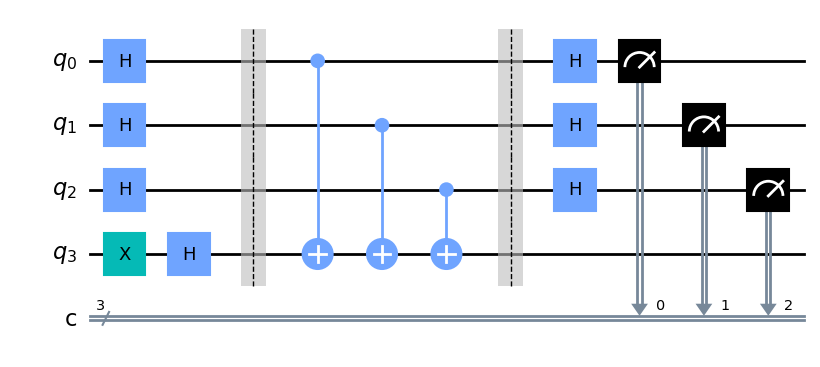

In [259]:
# Display the circuit diagram
qc.draw('mpl')

_STEP 6:_ Running the Circuit and Observing the Result

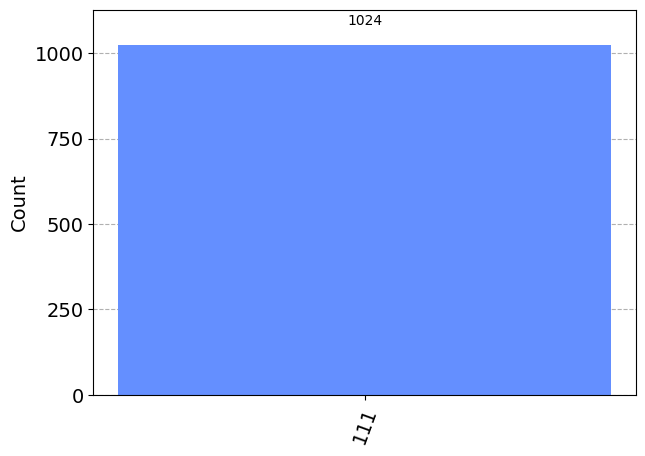

In [260]:

# Getting the 'qasm_simulator' backend from Basic Aer
simulator = BasicAer.get_backend('qasm_simulator')
# Executing the circuit using the Basic Aer simulator
result = execute(qc, backend=simulator, shots=1024).result()
# Displaying the histogram of results
plot_histogram(result.get_counts(qc))


##### **Evaluation of results**
In the Deutsch-Jozsa algorithm, an output of all 0's means it's a constant function, while any other result means it's a balanced function.
This demonstrates the quantum algorithm's ability to solve the problem with a single query.

##### **Conclusion**
This algorithm shows how quantum computing can be more effective than classical computing for specific tasks, like figuring out what type of function we have. It highlights the special abilities of quantum computers in solving certain problems more efficiently.

<a href="https://www.youtube.com/watch?v=pq2Okr_BO-Y" style="color: black;">**(9) Deutsch's Joza Algorithm in Qisket** _IBM_</a>

<hr>

## Quantum entanglement in quantum computers 

### Introduction to Quantum Entanglement
Quantum entanglement is an important aspect of quantum computing. When qubits become entangled, the state of one qubit is directly correlated with the state of another, no matter the distance between them.

### Entanglement in Deutsch's Algorithm
Deutsch's Algorithm relies heavily on entanglement. Entanglement lets the algorithm work on multiple inputs at the same time, thanks to superposition. This is different from basic superposition, where a single qubit can be in several states at once.

Demonstrating the creation of a simple entangled state using Qiskit:

c:\Users\ronan\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


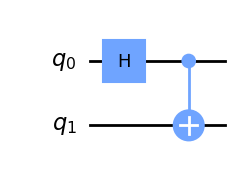

In [261]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram

entanglement_circuit = QuantumCircuit(2)
entanglement_circuit.h(0)
entanglement_circuit.cx(0, 1)
entanglement_circuit.draw(output='mpl')

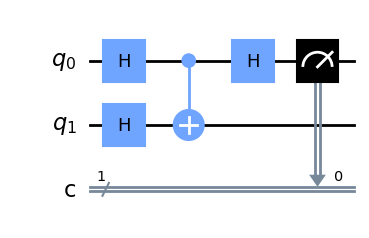

In [262]:
deutsch_circuit = QuantumCircuit(2, 1)
deutsch_circuit.h(0)
deutsch_circuit.h(1)
deutsch_circuit.cx(0, 1)
deutsch_circuit.h(0)
deutsch_circuit.measure(0, 0)
deutsch_circuit.draw(output='mpl')
deutsch_circuit.draw(output='mpl', style='clifford')

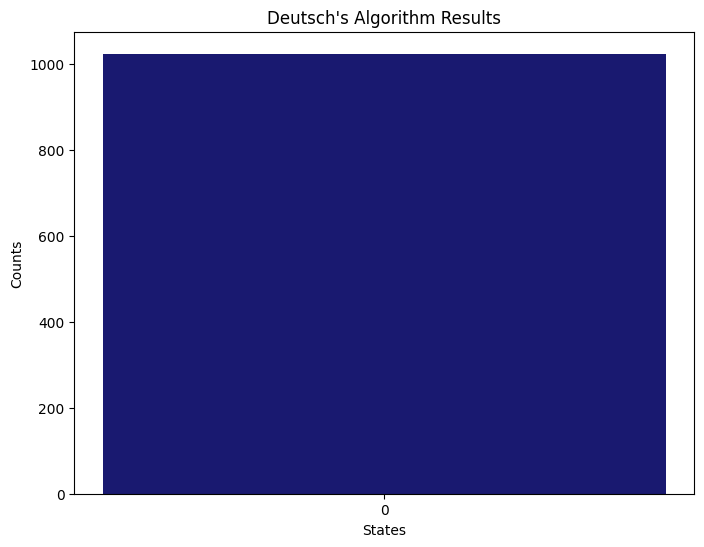

In [263]:
simulator = BasicAer.get_backend('qasm_simulator')
compiled_circuit = transpile(deutsch_circuit, simulator)
# Assemble the circuit directly without transpiling
job = execute(deutsch_circuit, simulator, shots=1024)
result = job.result()

counts = result.get_counts(deutsch_circuit)

# Plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(counts.keys(), counts.values(), color='midnightblue')
plt.xlabel('States')
plt.ylabel('Counts')
plt.title("Deutsch's Algorithm Results")
plt.show()

## References

1. https://www.ibm.com/topics/quantum-computing <span style="color: black;">Understanding Quantum Computing</span>
2. https://www.classiq.io/insights/the-deutsch-jozsa-algorithm-explained <span style="color: black;">Deutch Algorithm</span>
3. https://www.qmunity.tech/tutorials/deutschs-algorithm" <span style="color: black;">Explain Quantum computing</span>
4. https://research.ibm.com/blog/utility-toward-useful-quantum <span style="color: black;">Quantum vs Classical</span>
5. https://jpt.spe.org/quantum-computing-emerges-game-changer <span style="color: black;">Quantum Computing Emerges as a Game Changer</span>
6. https://www.educative.io/blog/intro-to-quantum-computing <span style="color: black;">Qubits, superposition & Entanglement</span>
7.  https://techcommunity.microsoft.com/t5/educator-developer-blog/quantum-gates-and-circuits-the-crash-course/ba-p/380463 <span style="color: black;">Quantum-Gates-and-Circuits</span>
8.  https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#deutschs-algorithm <span style="color: black;">Deutsch's Algorithm</span>
9.  https://www.youtube.com/watch?v=pq2Okr_BO-Y <span style="color: black;"></span>